# Analysis of Clustering Algorithms
## Dataset :: Anuran Calls(MFCCs)
*Name:* Diganta Mandal  
*Roll Number:* 22CS30062

---

This notebook provides an analysis of various clustering algorithms, including K-Means, Agglomerative, and DBSCAN, with evaluation metrics such as the Silhouette Score, Davies-Bouldin Index, and Calinski-Harabasz Index.

<b>Importing Required Libraries</b>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,PolynomialFeatures,LabelEncoder
import seaborn as sns
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score,davies_bouldin_score,calinski_harabasz_score
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import RandomForestClassifier

<b>Loading Dataset </b>

In [2]:
df=pd.read_csv('Frogs_MFCCs.csv')

# Data Pre-Processing and Analysis

In [3]:
df.head()

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1


Drop the column <b>RecordID</b> since it is of no use for understanding the dataset

In [4]:
df=df.drop(columns=['RecordID'])

## Exploratory Data Analysis(EDA)

In [5]:
df.info()#Gives a broad summary regarding data type and null count of each feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7195 entries, 0 to 7194
Data columns (total 25 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   MFCCs_ 1  7195 non-null   float64
 1   MFCCs_ 2  7195 non-null   float64
 2   MFCCs_ 3  7195 non-null   float64
 3   MFCCs_ 4  7195 non-null   float64
 4   MFCCs_ 5  7195 non-null   float64
 5   MFCCs_ 6  7195 non-null   float64
 6   MFCCs_ 7  7195 non-null   float64
 7   MFCCs_ 8  7195 non-null   float64
 8   MFCCs_ 9  7195 non-null   float64
 9   MFCCs_10  7195 non-null   float64
 10  MFCCs_11  7195 non-null   float64
 11  MFCCs_12  7195 non-null   float64
 12  MFCCs_13  7195 non-null   float64
 13  MFCCs_14  7195 non-null   float64
 14  MFCCs_15  7195 non-null   float64
 15  MFCCs_16  7195 non-null   float64
 16  MFCCs_17  7195 non-null   float64
 17  MFCCs_18  7195 non-null   float64
 18  MFCCs_19  7195 non-null   float64
 19  MFCCs_20  7195 non-null   float64
 20  MFCCs_21  7195 non-null   floa

In [6]:
missing_cols=df.isnull().sum()[df.isnull().sum()>0]
missing_cols

Series([], dtype: int64)

All columns are complete, with no NaN entries, so no additional entries are needed.

In [7]:
df.duplicated().sum()

np.int64(0)

All samples are unique

Three countplots are created to give an idea about distribution of Family,Genus and Species in the dataset

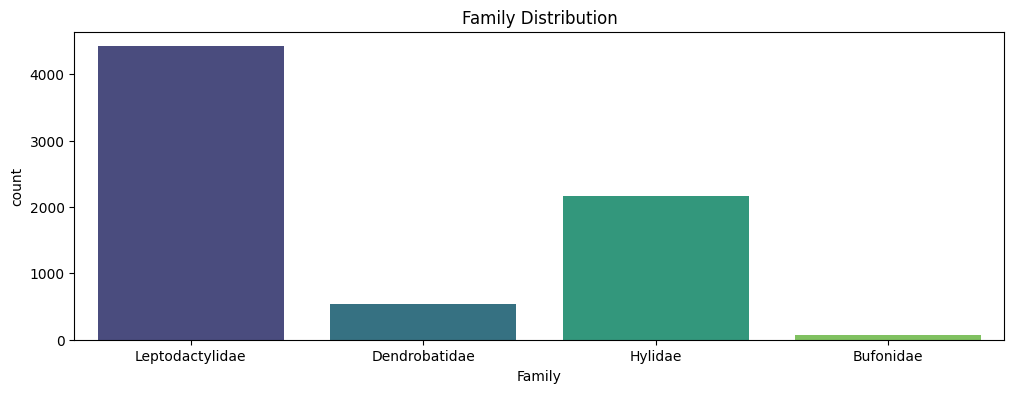

In [8]:
plt.figure(figsize=(12, 4))
sns.countplot(data=df, x='Family', hue='Family', palette='viridis', dodge=False, legend=False)
plt.title("Family Distribution")
plt.show()

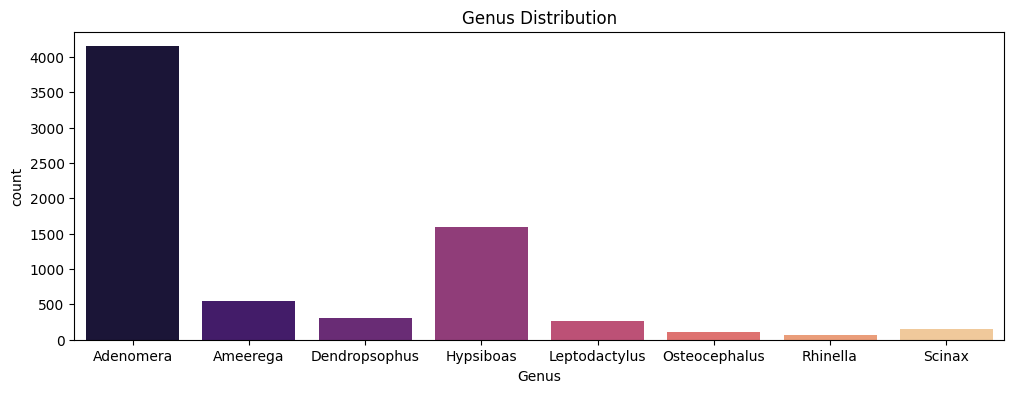

In [9]:
plt.figure(figsize=(12, 4))
sns.countplot(data=df, x='Genus', hue='Genus', palette='magma', dodge=False, legend=False)
plt.title("Genus Distribution")
plt.show()

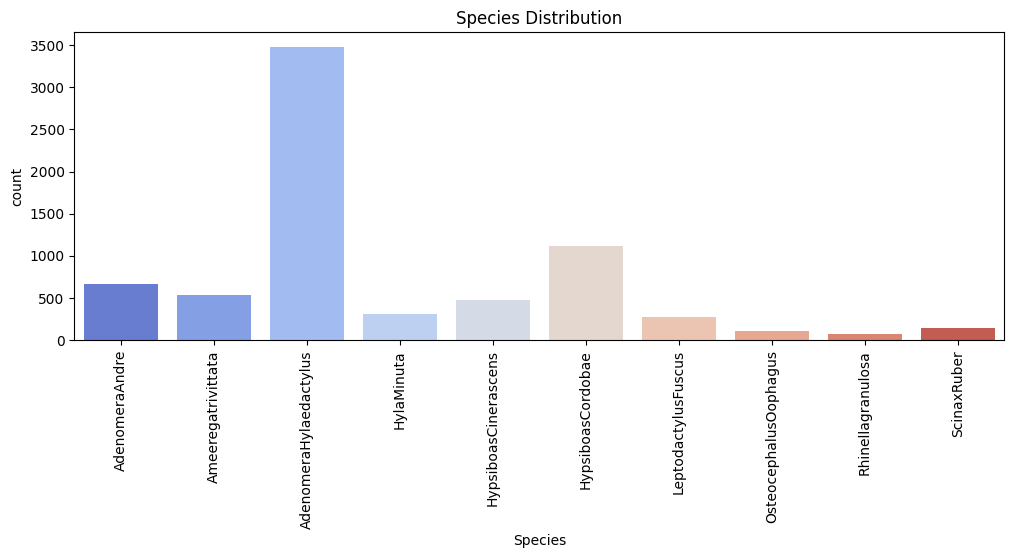

In [10]:
plt.figure(figsize=(12, 4))
sns.countplot(data=df, x='Species', hue='Species', palette='coolwarm', dodge=False, legend=False)
plt.title("Species Distribution")
plt.xticks(rotation=90)
plt.show()

<h3>Visualization of MFCC Feature Distributions</h3>
<br>
<h5>The code generates a histogram plot for each MFCC (Mel-frequency cepstral coefficient) feature to examine their individual distributions across the dataset. This visualization provides insight into:
</h5>


1. Distribution Shapes: Understanding the shape of each MFCC feature's distribution (e.g., normal, skewed) helps to identify any transformations that may be required.
2. Feature Comparison: By visualizing each feature separately, we can compare their ranges and observe any outliers or anomalies.
3. Data Preparation: Knowing the distributions aids in choosing appropriate preprocessing techniques (e.g., normalization or scaling) for improved model performance.

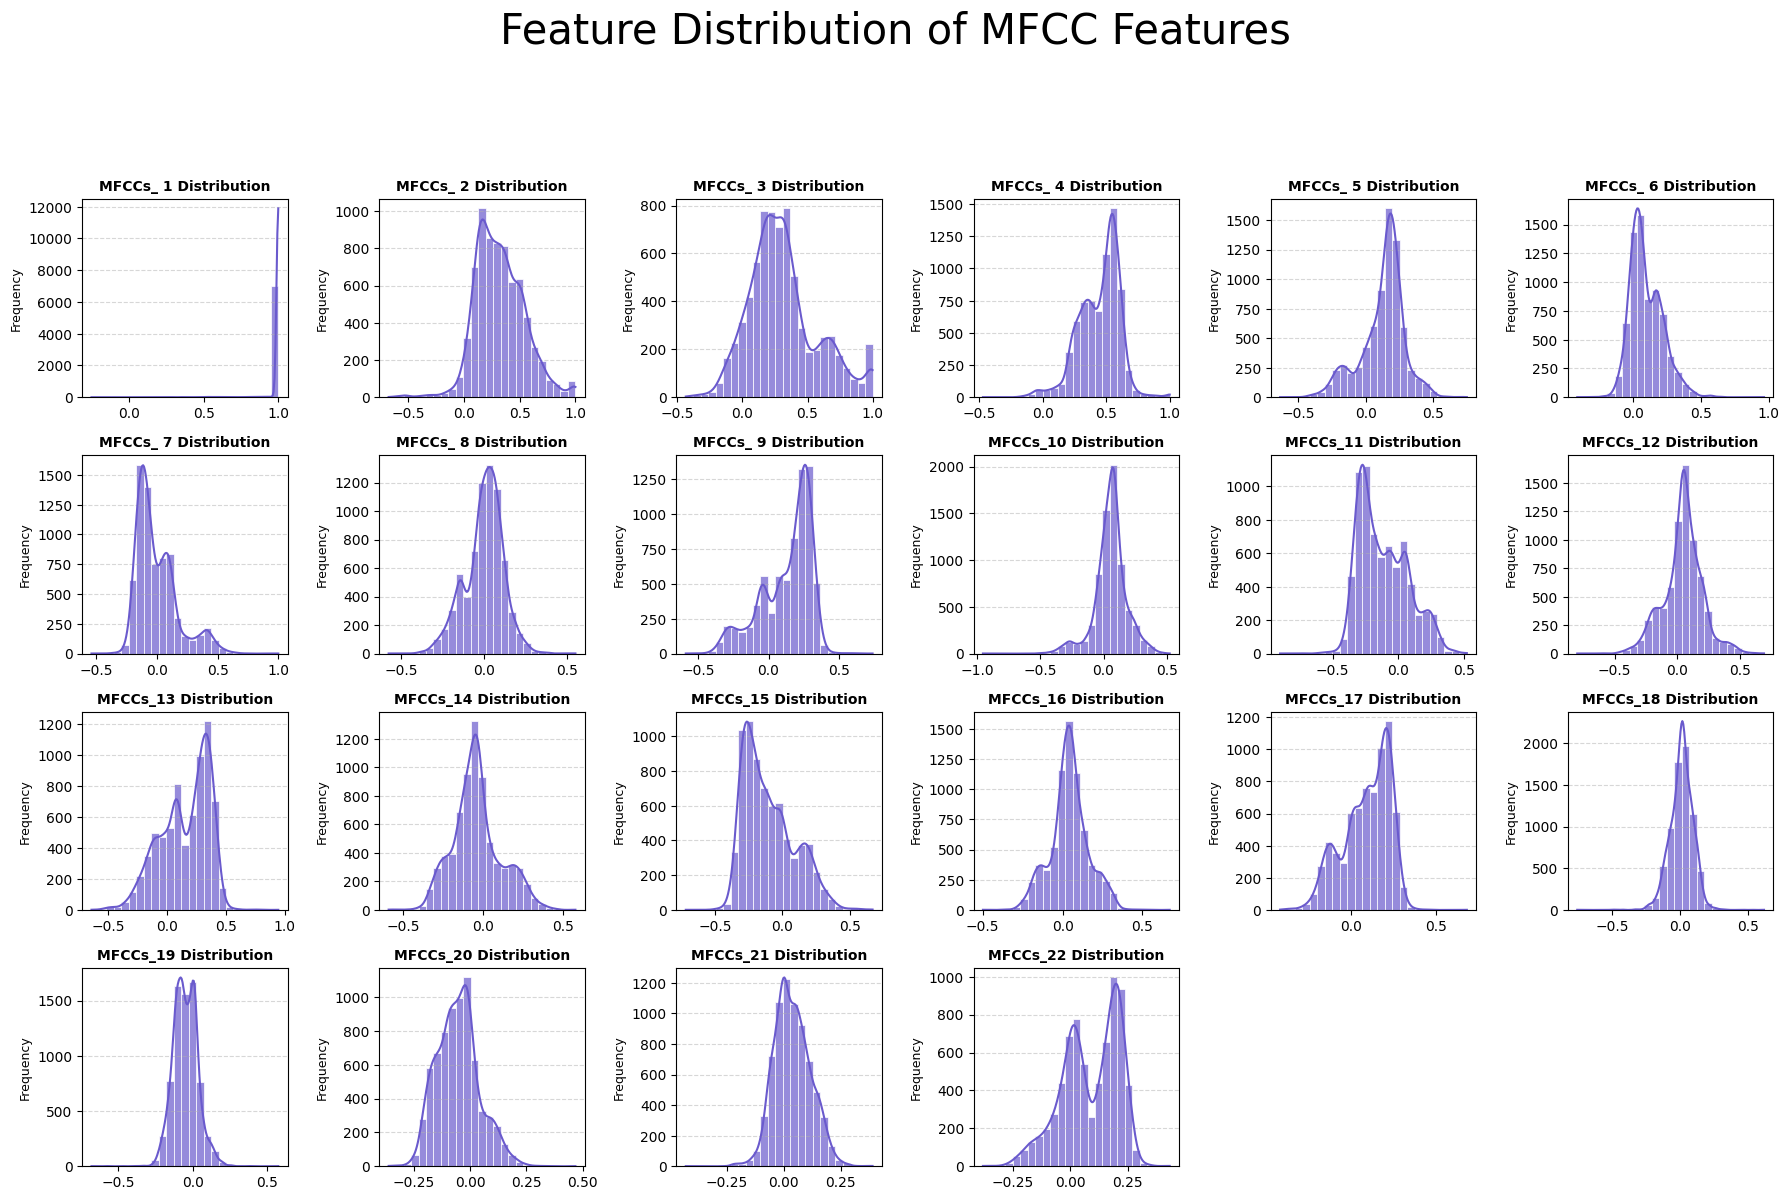

In [11]:
plt.figure(figsize=(18, 14))
MFCCs=df.columns[:-3]
for i, column in enumerate(MFCCs):
    plt.subplot(5, 6, i + 1)
    sns.histplot(df[column], kde=True, bins=25, color='#6A5ACD', edgecolor='white', alpha=0.7)
    plt.title(f'{column} Distribution', fontsize=10, fontweight='bold')
    plt.ylabel('Frequency', fontsize=9)
    plt.xlabel('')
    plt.grid(axis='y', linestyle='--', alpha=0.5)


plt.suptitle("Feature Distribution of MFCC Features", fontsize=30, y=1.02)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


<h3> Correlation matrix of MFCC Features</h3>
<h5>By examining the correlations among MFCC features, we can identify potential redundancies or dependencies between them, which can help in feature selection or dimensionality reduction. The heatmap provides a clear visual representation, using a color gradient to indicate the strength and direction of correlations</h5>

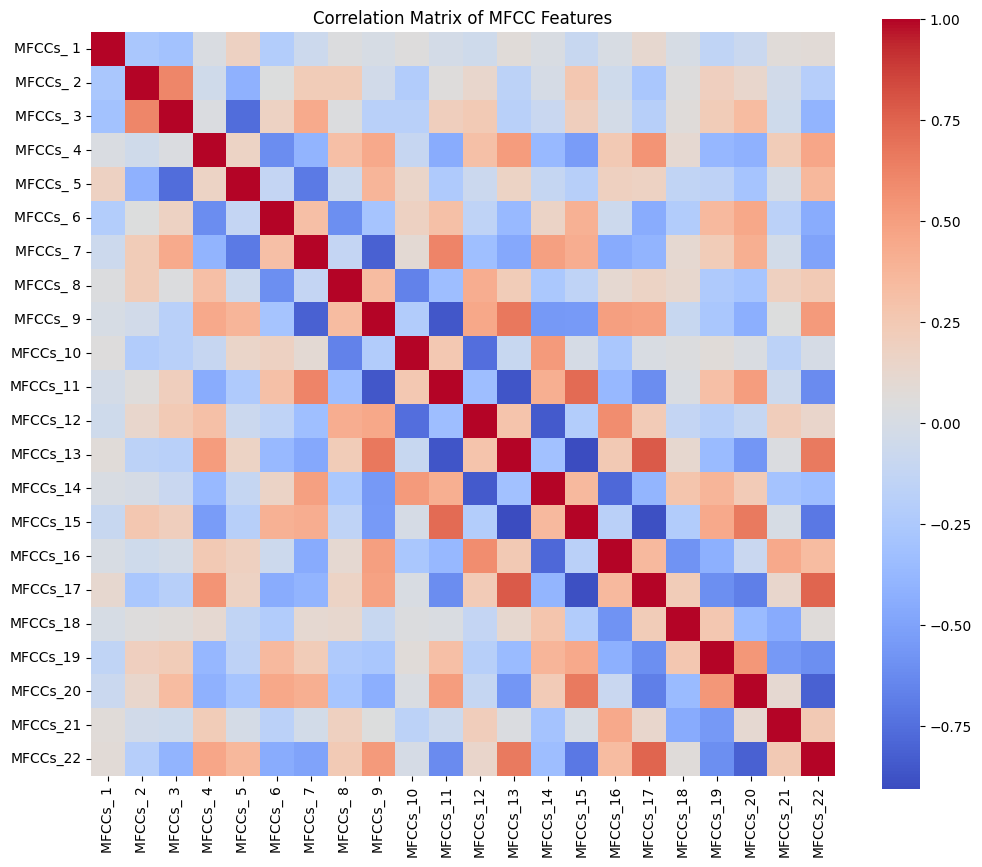

In [12]:
corr_matrix = df[df.columns[df.columns.str.contains('MFCC')]].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', square=True)
plt.title("Correlation Matrix of MFCC Features")
plt.show()

<h3> Box Plots of MFCC Features</h3>

This code snippet generates individual box plots for each MFCC (Mel-frequency cepstral coefficients) feature in a dataset. Box plots provide a statistical summary of each feature, displaying the median, quartiles, and potential outliers. This is particularly useful for analyzing the distribution and variability of MFCC features, as well as for detecting anomalies or outliers within each feature.

Each subplot represents one MFCC feature, and the overall layout organizes these plots in a grid, making it easier to compare distributions across multiple features.


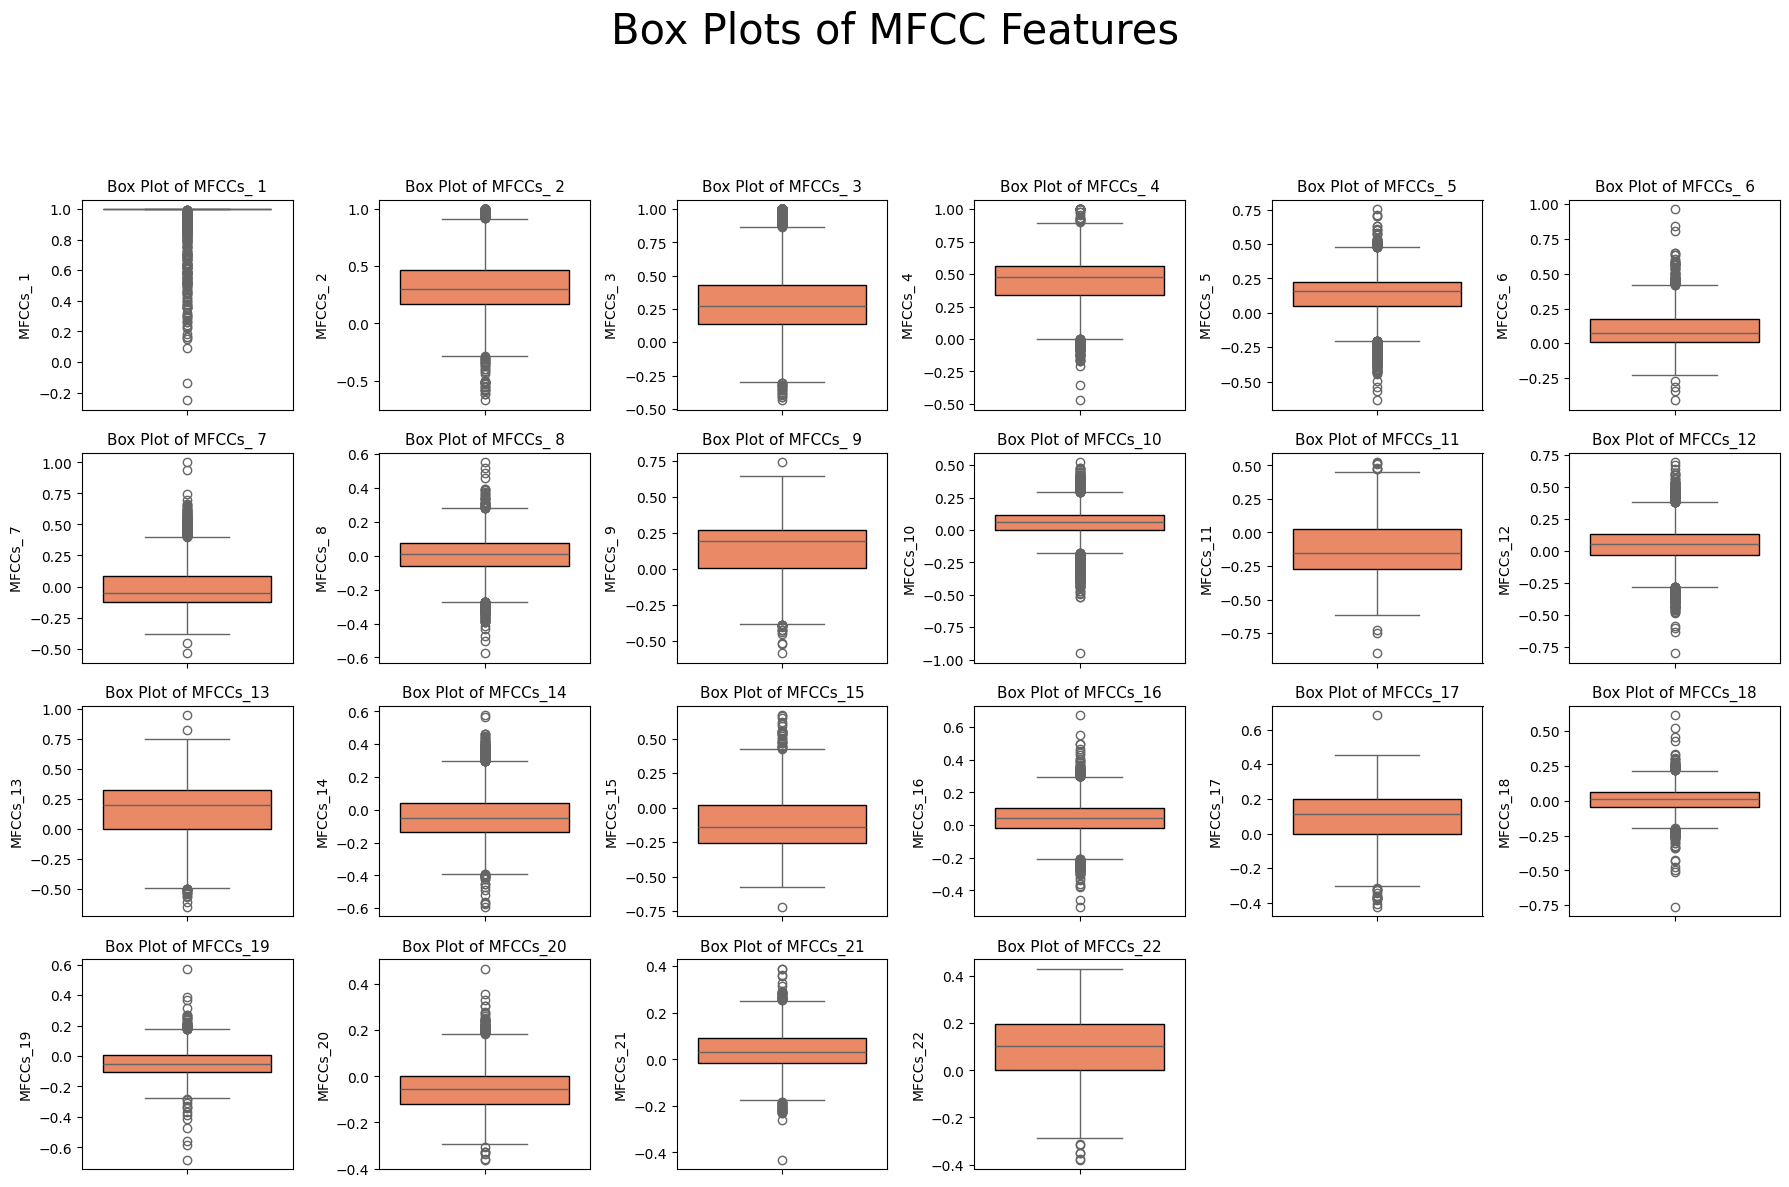

In [13]:

plt.figure(figsize=(18, 14))

for i, column in enumerate(MFCCs):
    plt.subplot(5, 6, i + 1)
    sns.boxplot(y=df[column], color='coral', boxprops=dict(edgecolor='black'))
    plt.title(f'Box Plot of {column}', fontsize=11)
    plt.ylabel(column, fontsize=10)


plt.suptitle("Box Plots of MFCC Features", fontsize=30, y=1.02)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

## Data Scaling

<h3>Standardization</h3>
<h5>Standardization is performed because of reasons mentioned below:</h5>

 * MFCC features often vary in scale, as they capture different aspects of the audio signal. Standardizing ensures that all MFCC features contribute equally, rather than some features dominating others due to larger numeric ranges.<br>
* K-Means relies on distance calculations (typically Euclidean distance) to assign points to clusters. If features have different scales, features with larger numerical ranges will dominate the distance calculation, biasing the clusters. Standardization ensures that all features contribute equally to the clustering process.


In [14]:
mfcc_cols = df.select_dtypes(include=['number'])
scaler = StandardScaler()
new_features = scaler.fit_transform(mfcc_cols)
new_df = pd.DataFrame(new_features, columns=mfcc_cols.columns)
df = df.drop(columns=mfcc_cols.columns).join(new_df)
df.head()

,Family,Genus,Species,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,...,MFCCs_13,MFCCs_14,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22
0,Leptodactylidae,Adenomera,AdenomeraAndre,0.146578,-0.780502,-1.581769,-1.529944,1.168666,1.352327,0.597119,...,-1.485897,0.796627,1.265956,-0.551081,-1.427291,-1.007678,0.483477,1.177905,1.023939,-0.595699
1,Leptodactylidae,Adenomera,AdenomeraAndre,0.146578,-0.695439,-1.556680,-1.107634,1.300622,1.415359,0.363097,...,-1.959178,0.406743,1.412903,-0.250524,-1.301412,-0.758490,0.171681,0.779239,0.565657,-0.474036
2,Leptodactylidae,Adenomera,AdenomeraAndre,0.146578,-0.783334,-1.495953,-0.990973,0.915536,0.763498,0.058992,...,-1.877203,0.590374,1.647536,0.345883,-1.009606,-0.369957,-0.208962,0.299030,0.777644,-0.084297
3,Leptodactylidae,Adenomera,AdenomeraAndre,0.146578,-0.453678,-0.729537,-0.727096,1.505993,2.184868,0.098592,...,-2.262481,0.181478,1.077586,-0.769643,-1.627648,-2.181026,-0.981638,-0.016165,-0.704780,-0.515365
4,Leptodactylidae,Adenomera,AdenomeraAndre,0.146578,-1.078343,-1.440441,-0.867225,1.252998,1.255819,0.048313,...,-2.172759,0.502823,1.710511,0.173262,-0.996517,-0.717936,-0.473426,0.232532,0.897212,-0.067430


There is no need for normalization since entries are already within a range of [-1,1]

## Feature Engineering

<h3>Polynomial Features</h5>

Polynomial features are generated for the dataset, excluding the non-numeric columns (Family, Genus, and Species).

Polynomial features allow the model to capture nonlinear relationships between features. By introducing interaction terms and higher-order terms (squared, cubed, etc.), the dataset can reveal patterns that linear models may not be able to capture. For example, instead of just having Feature1 and Feature2, you would also have Feature1 * Feature2, Feature1^2, etc., allowing for more complex relationships.

In [15]:
poly=PolynomialFeatures(degree=2,include_bias=False)#include_bias is set to False to exclude the constant bias term,
                                                    #focusing only on interaction terms
poly_features=poly.fit_transform(df.drop(columns=['Family','Genus','Species']))
poly_cols=poly.get_feature_names_out(df.columns[3:])
poly_df=pd.DataFrame(poly_features,columns=poly_cols)
df=df.drop(columns=df.columns[3:]).join(poly_df)
df.head()

,Family,Genus,Species,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,...,MFCCs_19^2,MFCCs_19 MFCCs_20,MFCCs_19 MFCCs_21,MFCCs_19 MFCCs_22,MFCCs_20^2,MFCCs_20 MFCCs_21,MFCCs_20 MFCCs_22,MFCCs_21^2,MFCCs_21 MFCCs_22,MFCCs_22^2
0,Leptodactylidae,Adenomera,AdenomeraAndre,0.146578,-0.780502,-1.581769,-1.529944,1.168666,1.352327,0.597119,...,0.233750,0.569490,0.495051,-0.288007,1.387461,1.206104,-0.701677,1.048452,-0.609960,0.354857
1,Leptodactylidae,Adenomera,AdenomeraAndre,0.146578,-0.695439,-1.556680,-1.107634,1.300622,1.415359,0.363097,...,0.029474,0.133781,0.097113,-0.081383,0.607213,0.440782,-0.369387,0.319967,-0.268141,0.224710
2,Leptodactylidae,Adenomera,AdenomeraAndre,0.146578,-0.783334,-1.495953,-0.990973,0.915536,0.763498,0.058992,...,0.043665,-0.062486,-0.162498,0.017615,0.089419,0.232539,-0.025207,0.604730,-0.065553,0.007106
3,Leptodactylidae,Adenomera,AdenomeraAndre,0.146578,-0.453678,-0.729537,-0.727096,1.505993,2.184868,0.098592,...,0.963614,0.015868,0.691840,0.505902,0.000261,0.011393,0.008331,0.496715,0.363219,0.265601
4,Leptodactylidae,Adenomera,AdenomeraAndre,0.146578,-1.078343,-1.440441,-0.867225,1.252998,1.255819,0.048313,...,0.224132,-0.110087,-0.424764,0.031923,0.054071,0.208631,-0.015680,0.804990,-0.060499,0.004547


## Feature Correlation Analysis

As a result of introducing polynomial features,there are many columns created. All may not be necessary.Here we keep only one feature if any two features have correlation higher than 0.8

In [16]:
corr_matrix=df[df.columns[df.columns.str.contains('MFCC')]].corr()
length=len(corr_matrix.columns)
highly_correlated_pairs = [(corr_matrix.columns[i], corr_matrix.columns[j])#Find pairs with high correlation
    for i in range(length)
    for j in range(i)
    if abs(corr_matrix.iloc[i, j]) > 0.8]

undesired_cols=set()
for pair in highly_correlated_pairs:
    undesired_cols.add(pair[1])#Remove one column from one such pair

print(f"Number of columns to be deleted:{len(undesired_cols)}")


Number of columns to be deleted:84


In [17]:
print(f"Shape of the dataset before feature selection:{df.shape}")
df=df.drop(columns=undesired_cols)
print(f"Shape of the dataset after feature selection:{df.shape}")

Shape of the dataset before feature selection:(7195, 278)
Shape of the dataset after feature selection:(7195, 194)


In [18]:
df.head()

,Family,Genus,Species,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 8,MFCCs_10,...,MFCCs_18 MFCCs_21,MFCCs_18 MFCCs_22,MFCCs_19^2,MFCCs_19 MFCCs_20,MFCCs_19 MFCCs_21,MFCCs_19 MFCCs_22,MFCCs_20 MFCCs_21,MFCCs_21^2,MFCCs_21 MFCCs_22,MFCCs_22^2
0,Leptodactylidae,Adenomera,AdenomeraAndre,-0.780502,-1.581769,-1.529944,1.168666,1.352327,-1.287190,0.540390,...,-1.031801,0.600273,0.233750,0.569490,0.495051,-0.288007,1.206104,1.048452,-0.609960,0.354857
1,Leptodactylidae,Adenomera,AdenomeraAndre,-0.695439,-1.556680,-1.107634,1.300622,1.415359,-1.909853,0.903961,...,-0.429045,0.359551,0.029474,0.133781,0.097113,-0.081383,0.440782,0.319967,-0.268141,0.224710
2,Leptodactylidae,Adenomera,AdenomeraAndre,-0.783334,-1.495953,-0.990973,0.915536,0.763498,-2.079764,1.389091,...,-0.287695,0.031186,0.043665,-0.062486,-0.162498,0.017615,0.232539,0.604730,-0.065553,0.007106
3,Leptodactylidae,Adenomera,AdenomeraAndre,-0.453678,-0.729537,-0.727096,1.505993,2.184868,-1.667990,1.686808,...,1.537145,1.124025,0.963614,0.015868,0.691840,0.505902,0.011393,0.496715,0.363219,0.265601
4,Leptodactylidae,Adenomera,AdenomeraAndre,-1.078343,-1.440441,-0.867225,1.252998,1.255819,-2.279164,1.655798,...,-0.644141,0.048411,0.224132,-0.110087,-0.424764,0.031923,0.208631,0.804990,-0.060499,0.004547


## Label Encoding

 Label encoding is used to convert categorical features ('Family', 'Genus', 'Species') into numerical representations. This helps to deal with only numerical input. LabelEncoder assigns a unique integer to each category within a feature.

In [19]:
label_encoder=LabelEncoder()
df['Family']=label_encoder.fit_transform(df['Family'])
df['Genus']=label_encoder.fit_transform(df['Genus'])
df['Species']=label_encoder.fit_transform(df['Species'])
df.tail()

,Family,Genus,Species,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 8,MFCCs_10,...,MFCCs_18 MFCCs_21,MFCCs_18 MFCCs_22,MFCCs_19^2,MFCCs_19 MFCCs_20,MFCCs_19 MFCCs_21,MFCCs_19 MFCCs_22,MFCCs_20 MFCCs_21,MFCCs_21^2,MFCCs_21 MFCCs_22,MFCCs_22^2
7190,2,7,9,-4.016170,-2.462691,-2.560334,-0.568707,2.869620,-0.863178,0.197313,...,-0.555864,-1.012526,0.741278,0.966291,-0.641132,-1.167845,-0.835746,0.554516,1.010070,1.839878
7191,2,7,9,-3.845885,-2.587381,-2.590651,-0.362294,2.532740,-0.998247,0.259940,...,-0.479503,-1.109110,0.663226,0.862221,-0.540421,-1.250016,-0.702570,0.440355,1.018559,2.355968
7192,2,7,9,-4.144477,-2.483641,-2.598170,-0.386371,2.389106,-0.885227,0.199218,...,-0.393548,-1.124683,0.232347,0.414992,-0.229559,-0.656035,-0.410012,0.226804,0.648163,1.852325
7193,2,7,9,-3.856057,-2.348221,-2.812679,-0.332988,2.318802,-0.992559,0.262161,...,-0.594025,-1.081535,0.667535,0.824606,-0.670622,-1.220995,-0.828420,0.673723,1.226641,2.233333
7194,2,7,9,-3.807282,-2.411038,-2.394823,-0.300134,2.485390,-1.008663,0.158804,...,-0.645896,-1.094459,0.303799,0.496337,-0.462428,-0.783577,-0.755501,0.703886,1.192723,2.021048


# K-Means Clustering

## Elbow Method

Elbow method is utilised for deciding the optimal number of clusters. Although it gives a good idea regarding number of clusters. A variety of other aspects were considered like Silhouette Score for obtaining number of clusters.

In [20]:
df_reduced=df.iloc[:,3:]
no_of_clusters=range(1,20)
wcss=[] #List to store the wcss for varying number of clusters
for i in no_of_clusters:
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(df_reduced)
    wcss.append(kmeans.inertia_)


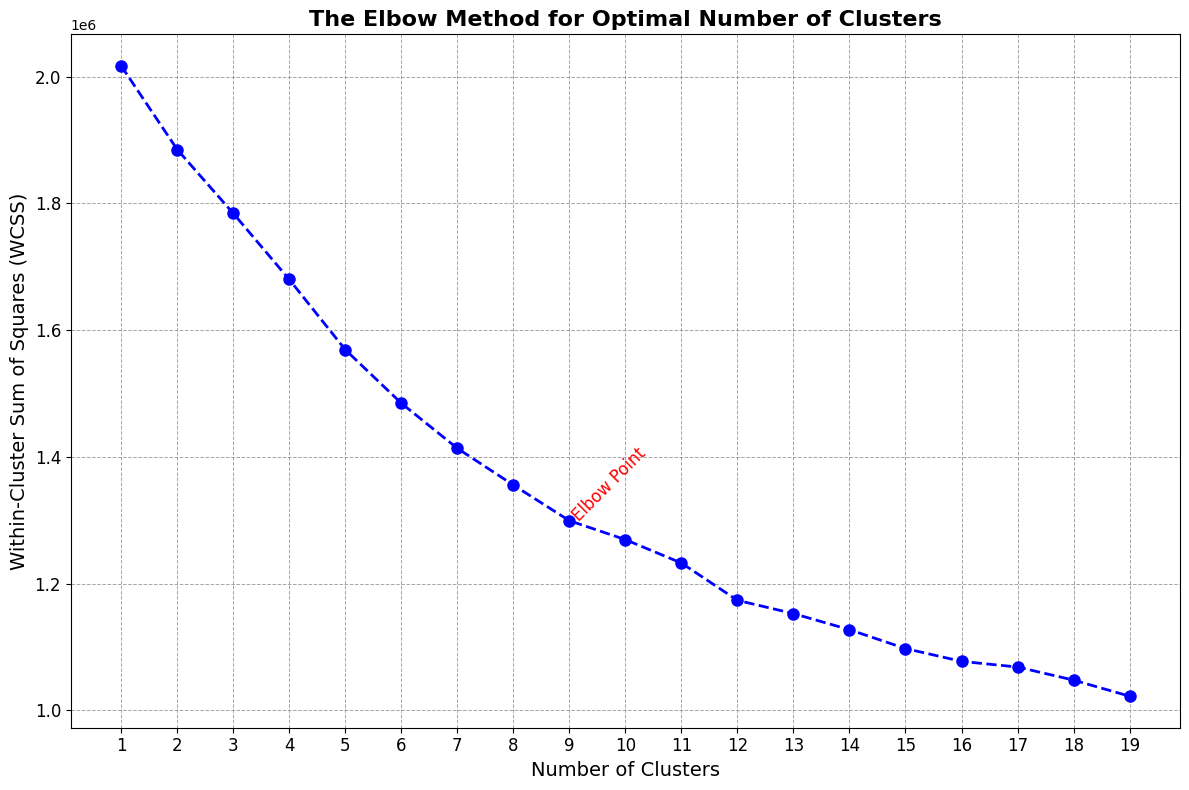

In [21]:

plt.figure(figsize=(12, 8))

# Plot WCSS against the number of clusters with specific styling
plt.plot(no_of_clusters, wcss, marker='o', linestyle='--', color='b', markersize=8, linewidth=2)


plt.title('The Elbow Method for Optimal Number of Clusters', fontsize=16, fontweight='bold')
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Within-Cluster Sum of Squares (WCSS)', fontsize=14)


plt.xticks(no_of_clusters, fontsize=12)
plt.yticks(fontsize=12)

# Add a grid for better readability
plt.grid(color='gray', linestyle='--', linewidth=0.7, alpha=0.7)

# Annotate the optimal elbow point on the plot
elbow_point = 9
plt.annotate('Elbow Point',
             xy=(elbow_point, wcss[elbow_point - 1]),
             xytext=(elbow_point, wcss[elbow_point - 1] + 10),
             fontsize=12, color='red', rotation=45)


plt.tight_layout()
plt.show()


## Silhouette Score Evaluation

The Silhouette score is a metric used to evaluate how good clustering results are in data clustering. This score is calculated by measuring each data point’s similarity to the cluster it belongs to and how different it is from other clusters.
The silhouette score for a data point \(i\) is defined as:

$$
s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

where:
- s(i) is the silhouette score for the \(i\)-th data point.
- a(i) is the average distance between the \(i\)-th data point and all other points in the same cluster.
- b(i) is the minimum average distance from the \(i\)-th data point to all points in any other cluster.


A higher silhouette score indicated better clustering.

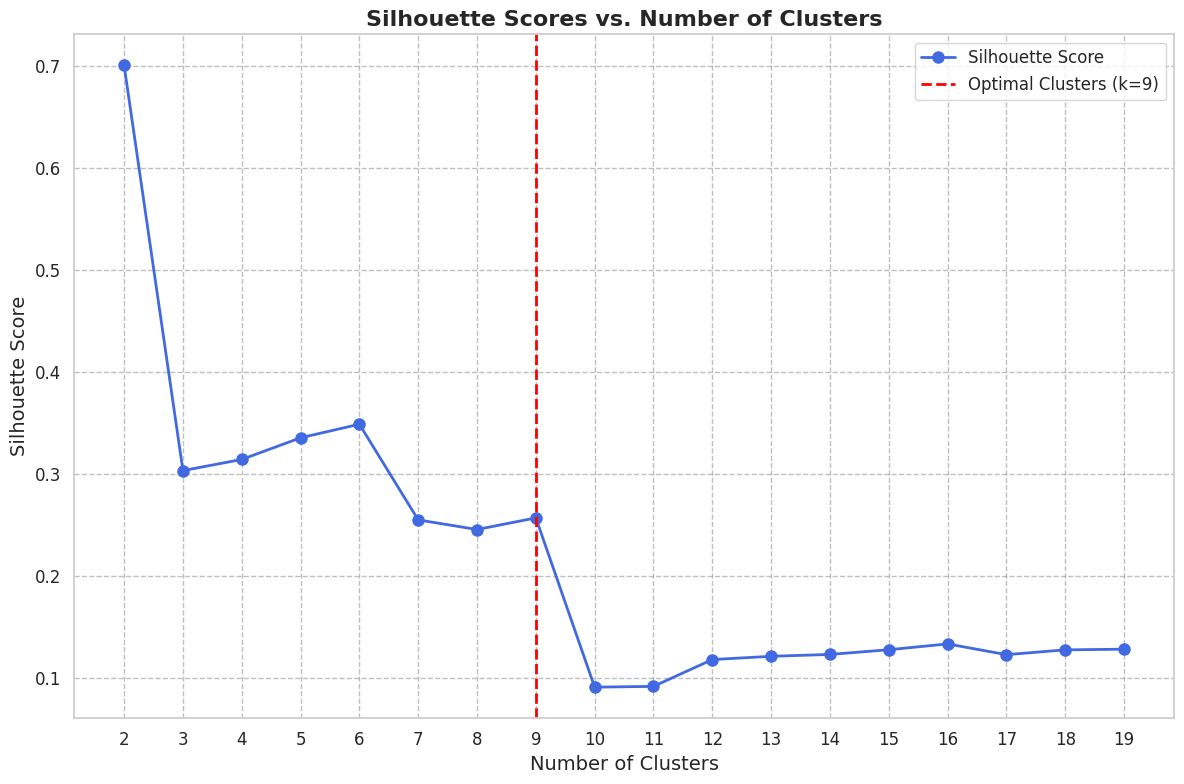

In [22]:
silhouette_scores=[]
no_of_clusters=range(2,20)
for i in no_of_clusters:
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    clusters=kmeans.fit_predict(df_reduced)
    silhouette_avg=silhouette_score(df_reduced,clusters)
    silhouette_scores.append(silhouette_avg)


plt.figure(figsize=(12, 8))
sns.set(style='whitegrid')
plt.plot(no_of_clusters, silhouette_scores, marker='o', color='royalblue', markersize=8, linewidth=2, label='Silhouette Score')
plt.axvline(x=9, color='red', linestyle='--', linewidth=2, label='Optimal Clusters (k=9)')
plt.title('Silhouette Scores vs. Number of Clusters', fontsize=16, fontweight='bold')
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Silhouette Score', fontsize=14)
plt.xticks(no_of_clusters, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(color='gray', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Cluster Implementation

In [23]:
#Running KMeans with 9 clusters on the dataset
optimal_k=9
kmeans=KMeans(n_clusters=optimal_k,init='k-means++',random_state=42)
clusters=kmeans.fit_predict(df_reduced)
silhouette_avg=silhouette_score(df_reduced,clusters)
print(f"Silhouette Score for k={optimal_k}: {silhouette_avg}")

Silhouette Score for k=9: 0.25689014221195794


## Cluster Initialization

 Silhouette Score Comparison of KMeans Initializations

In this analysis, we compare the silhouette scores obtained from KMeans clustering using two different initialization methods: **Random Initialization** and **k-Means++ Initialization**. The silhouette score is a measure of how well each data point is clustered, with higher values indicating better-defined clusters.


In [24]:
random_silhouette=[]
kmeanspp_silhouette=[]
for k in no_of_clusters:
    kmeans_kmeanspp=KMeans(n_clusters=k,init='k-means++',random_state=42)
    kmeanspp_clusters=kmeans_kmeanspp.fit_predict(df_reduced)
    kmeanspp_silhouette_avg=silhouette_score(df_reduced,kmeanspp_clusters)
    
    kmeans_random=KMeans(n_clusters=k,init='random',random_state=42)
    random_clusters=kmeans_random.fit_predict(df_reduced)
    random_silhouette_avg=silhouette_score(df_reduced,random_clusters)
    kmeanspp_silhouette.append(kmeanspp_silhouette_avg)
    random_silhouette.append(random_silhouette_avg)





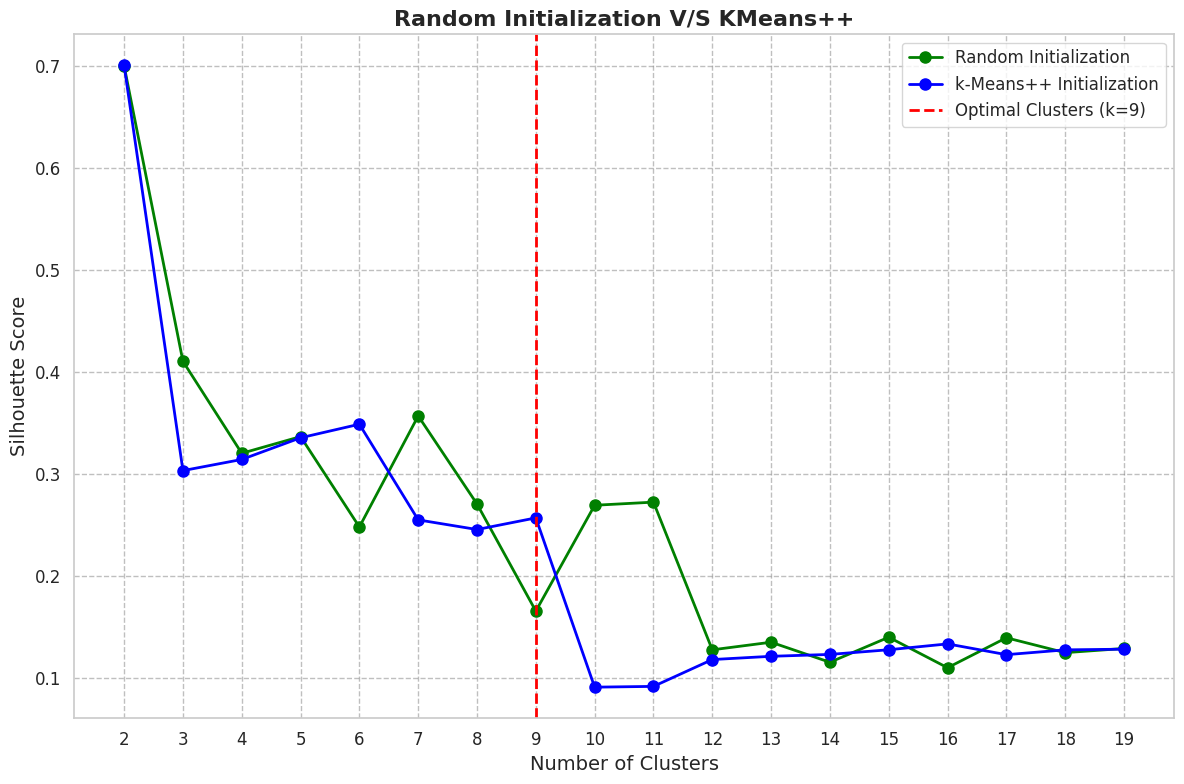

In [25]:
plt.figure(figsize=(12, 8))
sns.set(style='whitegrid')
plt.plot(no_of_clusters, random_silhouette, marker='o', color='green', markersize=8, linewidth=2, label='Random Initialization')
plt.plot(no_of_clusters, kmeanspp_silhouette, marker='o', color='blue', markersize=8, linewidth=2, label='k-Means++ Initialization')
plt.axvline(x=9, color='red', linestyle='--', linewidth=2, label='Optimal Clusters (k=9)')
plt.title('Random Initialization V/S KMeans++', fontsize=16, fontweight='bold')
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Silhouette Score', fontsize=14)
plt.xticks(no_of_clusters, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(color='gray', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

The results obtained from Random Initialization demonstrate considerable variability due to the random nature of cluster initialization. Consequently, there can be abrupt increases or decreases in the silhouette score with even minor changes in the number of clusters, such as altering the count by just one or two.

# Cluster Visualization

For the purpose of visualizing clusters in a 2D-plot dimensionality reduction is performed using PCA and t-SNE

## PCA

In [26]:
pca=PCA(n_components=2)#2 components are obtained from PCA
df_pca=pca.fit_transform(df_reduced)


In [27]:
clusters

array([3, 3, 3, ..., 0, 0, 0], dtype=int32)

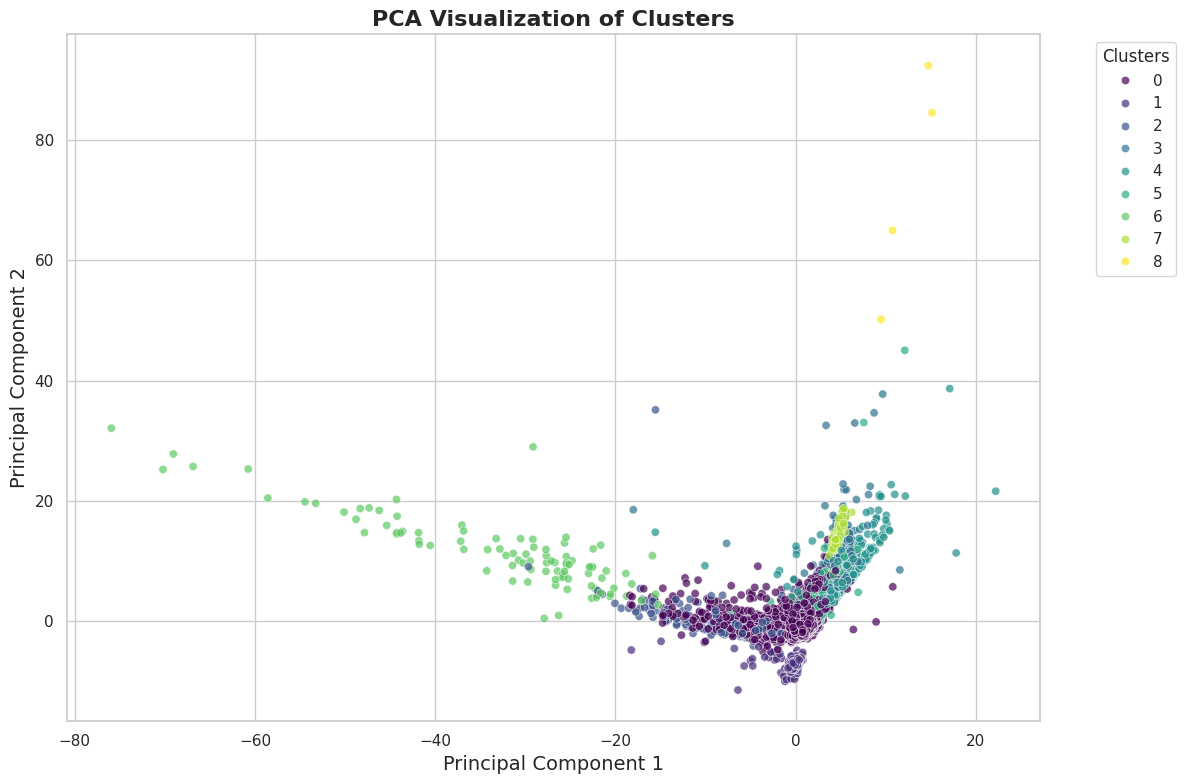

In [28]:
plt.figure(figsize=(12, 8))

# Create the scatter plot
scatter = sns.scatterplot(
    x=df_pca[:, 0],
    y=df_pca[:, 1],
    hue=clusters,
    palette='viridis',
    alpha=0.7,
    legend='full'
)


handles, labels = scatter.get_legend_handles_labels()

by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.title('PCA Visualization of Clusters', fontsize=16, fontweight='bold')
plt.xlabel('Principal Component 1', fontsize=14)
plt.ylabel('Principal Component 2', fontsize=14)

plt.tight_layout()
plt.show()

## t-SNE

In [29]:
tsne=TSNE(n_components=2,random_state=42)
df_tsne=tsne.fit_transform(df_reduced)

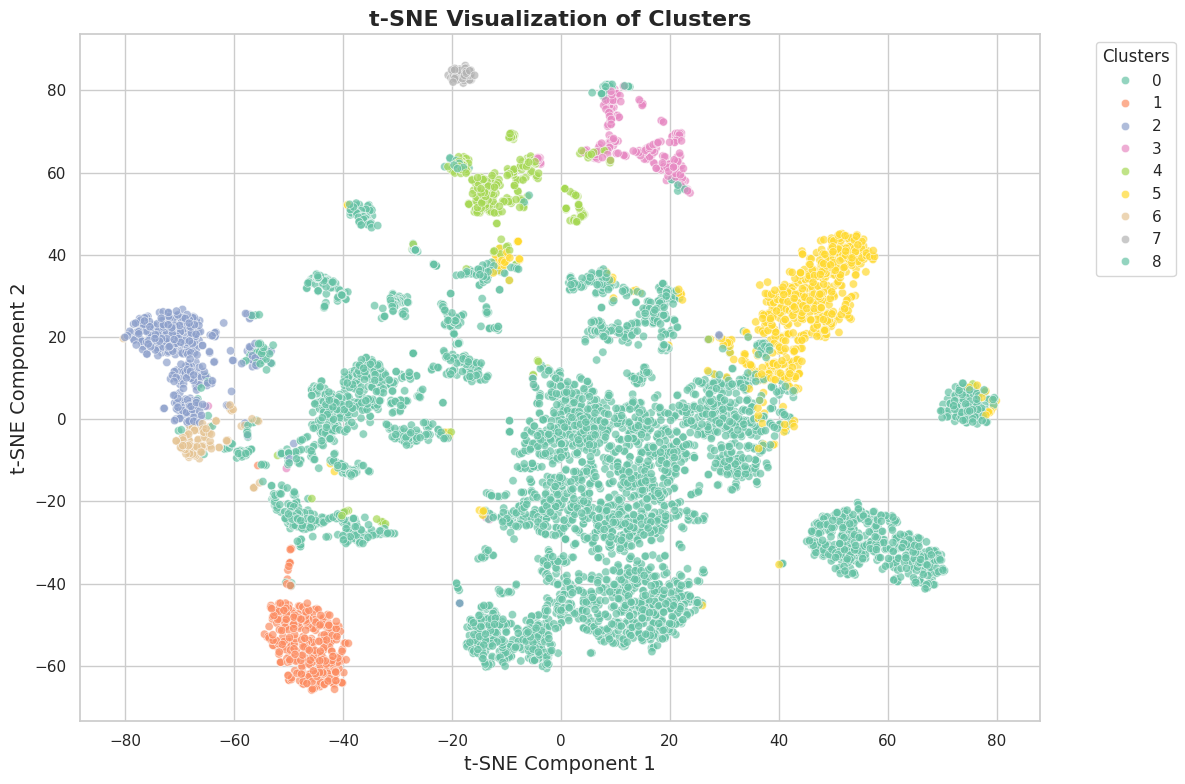

In [30]:
plt.figure(figsize=(12, 8))

# Create the scatter plot
scatter = sns.scatterplot(
    x=df_tsne[:, 0],
    y=df_tsne[:, 1],
    hue=clusters,
    palette='Set2',
    alpha=0.7,
    legend='full'
)


handles, labels = scatter.get_legend_handles_labels()

by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys(), title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.title('t-SNE Visualization of Clusters', fontsize=16, fontweight='bold')
plt.xlabel('t-SNE Component 1', fontsize=14)
plt.ylabel('t-SNE Component 2', fontsize=14)

plt.tight_layout()
plt.show()

## Feature Contribution to Clustering

In this analysis, we aim to evaluate the importance of different features in predicting cluster memberships obtained from a clustering algorithm. By using a **Random Forest Classifier**, we can gain insights into which features contribute most significantly to the clustering results.


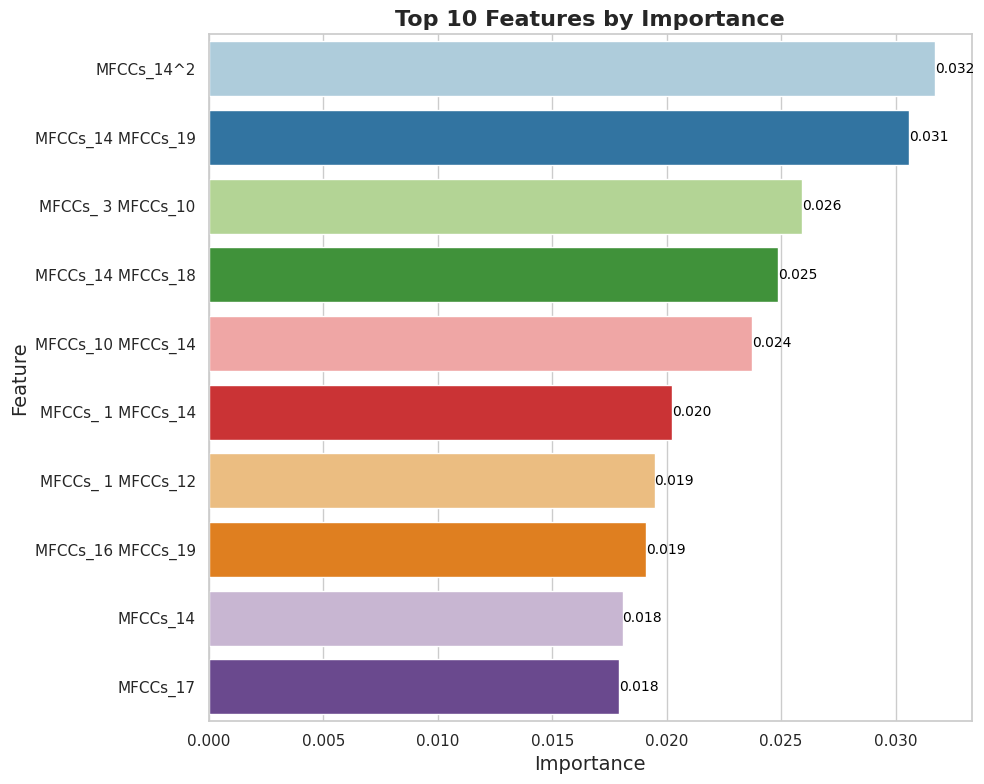

In [31]:



df['Cluster'] = clusters
X = df.drop(columns=['Cluster'])
y = df['Cluster']


rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X, y)


feature_importances = rf.feature_importances_
feature_importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
top_10_features = feature_importances_df.head(10)

plt.figure(figsize=(10, 8))
barplot = sns.barplot(x='Importance', y='Feature',hue='Feature',data=top_10_features, palette='Paired',legend=False)


plt.title('Top 10 Features by Importance', fontsize=16, fontweight='bold')
plt.xlabel('Importance', fontsize=14)
plt.ylabel('Feature', fontsize=14)


def format_legend():
    for p in barplot.patches:
        barplot.annotate(f'{p.get_width():.3f}',
                         (p.get_width(), p.get_y() + p.get_height() / 2),
                         ha='left', va='center', fontsize=10, color='black')


format_legend()

plt.tight_layout()
plt.show()


# Cluster Evaluation Metrics

## Davies-Bouldin Index

The **Davies-Bouldin Index (DBI)** is a metric used to evaluate the quality of clustering algorithms. It provides a means to assess how well the clusters are separated and how compact they are, aiding in the selection of the optimal number of clusters for a given dataset.

## Definition

The Davies-Bouldin Index is defined as:

$$
DBI = \frac{1}{k} \sum_{i=1}^{k} \max_{j \neq i} \left( \frac{s_i + s_j}{d_{ij}} \right)
$$

where:
-  k  is the number of clusters.
-  $s_i$   is the average distance between each point in cluster  i  and the centroid of cluster  i  (i.e., the intra-cluster distance).
- $d_{ij}$ is the distance between the centroids of clusters  i  and  j  (i.e., the inter-cluster distance).

## Interpretation

- **Lower Values Indicate Better Clustering**: A lower DBI indicates that the clusters are well-separated and compact. Ideally, the value of the Davies-Bouldin Index should be as low as possible.
- **Cluster Compactness and Separation**: The DBI takes into account both the compactness of the clusters (how close the points in a cluster are to each other) and the separation between different clusters (how far apart the cluster centroids are).

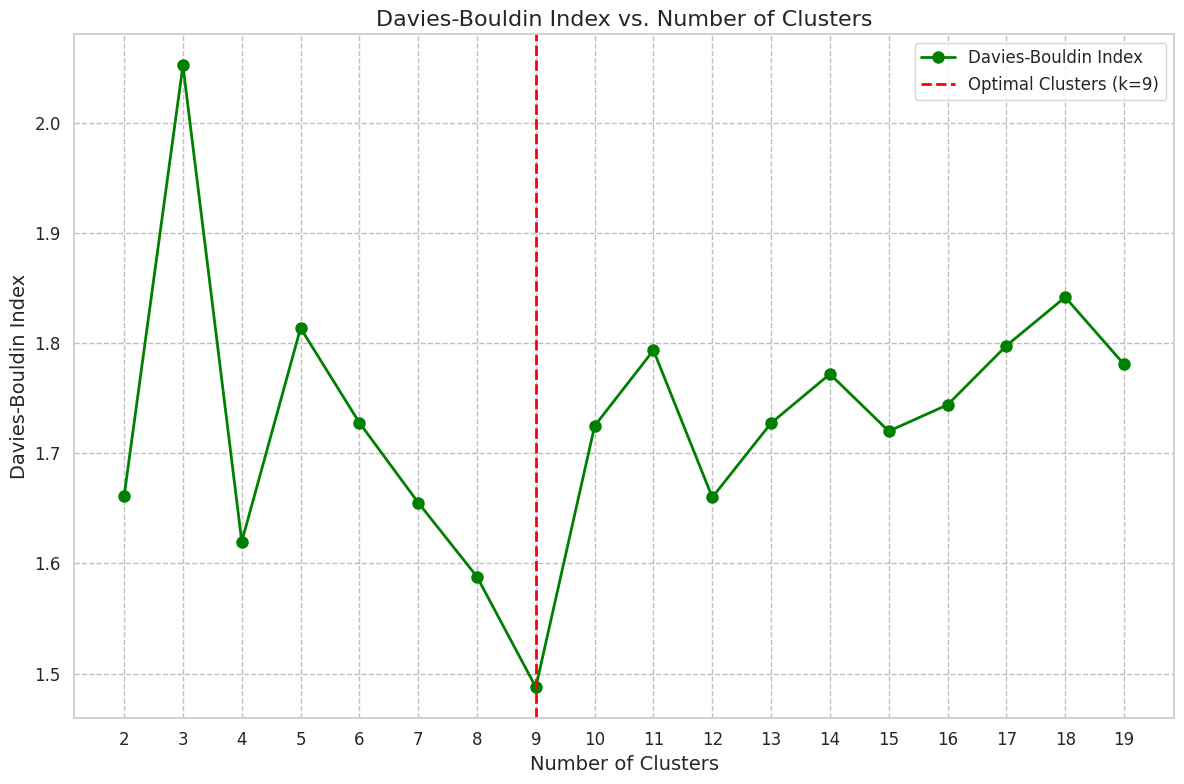

In [32]:
davies_bouldin_scores = []
for k in no_of_clusters:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    clusters = kmeans.fit_predict(df_reduced)
    davies_bouldin_index = davies_bouldin_score(df_reduced, clusters)
    davies_bouldin_scores.append(davies_bouldin_index)
plt.figure(figsize=(12, 8))
sns.set(style='whitegrid')
plt.plot(no_of_clusters, davies_bouldin_scores, marker='o', color='green', markersize=8, linewidth=2, label='Davies-Bouldin Index')
plt.title('Davies-Bouldin Index vs. Number of Clusters', fontsize=16)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Davies-Bouldin Index', fontsize=14)
plt.xticks(no_of_clusters, fontsize=12)
plt.yticks(fontsize=12)
plt.axvline(x=9, color='red', linestyle='--', linewidth=2, label='Optimal Clusters (k=9)')
plt.legend(fontsize=12)
plt.grid(color='gray', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

## Calinski-Harabasz Index

The **Calinski-Harabasz Index (CHI)**, also known as the Variance Ratio Criterion, is a metric used to evaluate the quality of clustering algorithms. It provides a method for assessing the separation and compactness of clusters, aiding in the determination of the optimal number of clusters for a dataset.

## Definition

The Calinski-Harabasz Index is defined as:

$$
CHI = \frac{B(k)}{W(k)}
$$

where:
-  B(k)  is the between-cluster dispersion, measuring how far apart the cluster centroids are from the overall centroid.
-  W(k)  is the within-cluster dispersion, measuring how close the points within each cluster are to their respective centroid.
-  k  is the number of clusters.

Mathematically, these can be represented as:
- **Between-cluster dispersion**:
  $$
  B(k) = \sum_{i=1}^{k} n_i \| \mathbf{c}_i - \mathbf{c} \|^2
  $$
  where  $n_i$  is the number of points in cluster  i , $c_i$ is the centroid of cluster  i , and c is the overall centroid of the dataset.
  
- **Within-cluster dispersion**:
  $$
  W(k) = \sum_{i=1}^{k} \sum_{\mathbf{x} \in C_i} \| \mathbf{x} - \mathbf{c}_i \|^2
  $$
  where  $C_i$  is the set of points in cluster  i .

## Interpretation

- **Higher Values Indicate Better Clustering**: A higher Calinski-Harabasz Index indicates that clusters are well-separated and compact. The goal is to maximize this index when evaluating clustering solutions.
- **Cluster Separation and Compactness**: The index effectively balances the distances between cluster centroids (separation) and the spread of points within each cluster (compactness).


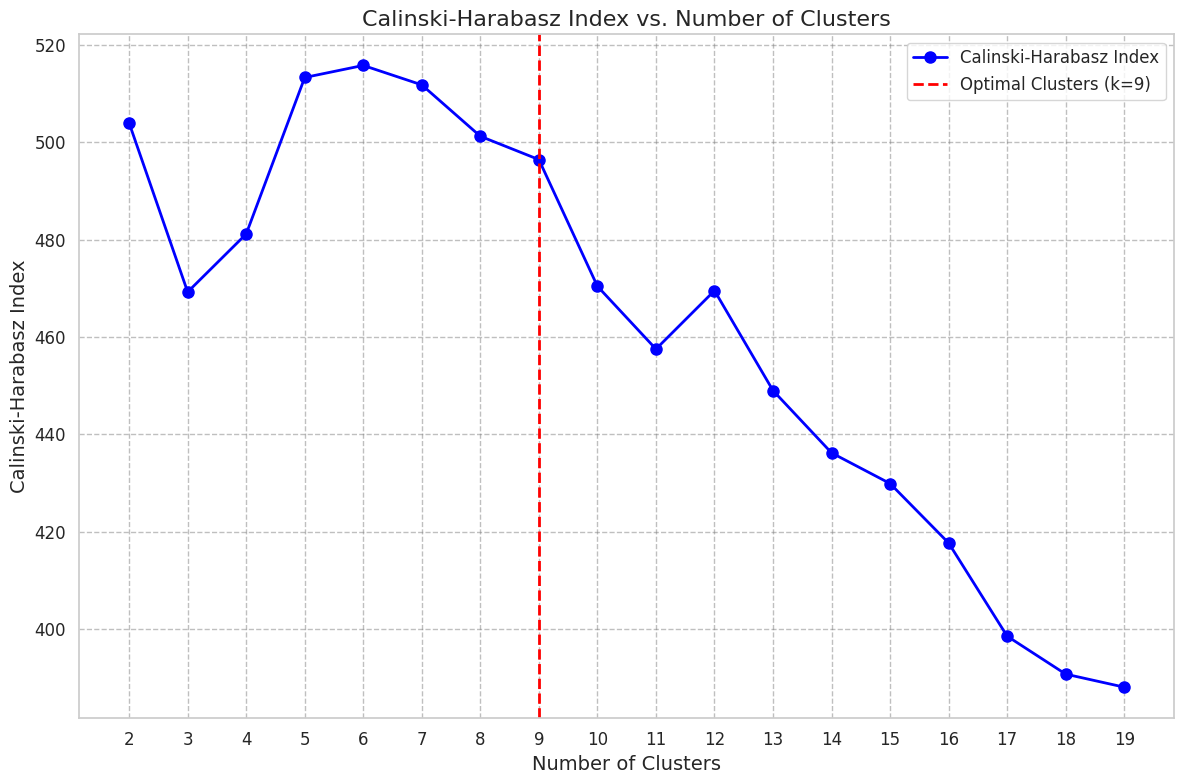

In [33]:
calinski_harabasz_scores=[]
for k in no_of_clusters:
    kmeans=KMeans(n_clusters=k,init='k-means++',random_state=42)
    clusters=kmeans.fit_predict(df_reduced)
    calinski=calinski_harabasz_score(df_reduced,clusters)
    calinski_harabasz_scores.append(calinski)

plt.figure(figsize=(12, 8))
sns.set(style='whitegrid')
plt.plot(no_of_clusters, calinski_harabasz_scores, marker='o', color='blue', markersize=8, linewidth=2, label='Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index vs. Number of Clusters', fontsize=16)
plt.xlabel('Number of Clusters', fontsize=14)
plt.ylabel('Calinski-Harabasz Index', fontsize=14)
plt.axvline(x=9, color='red', linestyle='--', linewidth=2, label='Optimal Clusters (k=9)')
plt.xticks(no_of_clusters,fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)
plt.grid(color='gray', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


# Comparison with Other Clustering Algorithms

Other clustering algorithms like <b>Agglomerative Hierarchical Clustering</b> and <b>DBSCAN</b> are also trained on the same dataset

In [34]:
optimal_k=9
kmeans=KMeans(n_clusters=optimal_k,init='k-means++',random_state=42)
agg_clustering=AgglomerativeClustering(n_clusters=optimal_k)
dbscan=DBSCAN(eps=0.7,min_samples=10)

kmeans_clusters=kmeans.fit_predict(df_reduced)
agg_clusters=agg_clustering.fit_predict(df_reduced)
dbscan_clusters=dbscan.fit_predict(df_reduced)



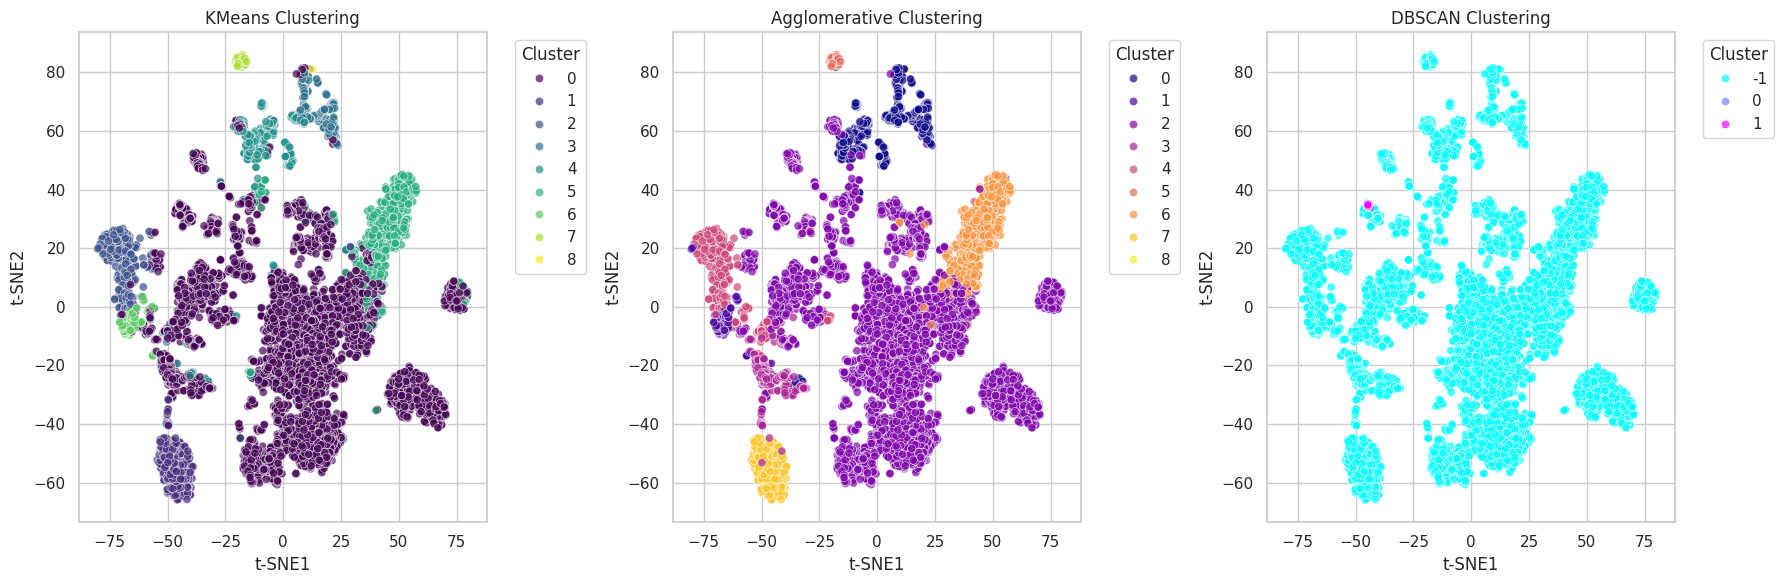

In [35]:
tsne = TSNE(n_components=2, random_state=42)
df_tsne = tsne.fit_transform(df_reduced)

visual_df = pd.DataFrame(df_tsne, columns=['t-SNE1', 't-SNE2'])
visual_df['KMeans'] = kmeans_clusters
visual_df['Agglomerative'] = agg_clusters
visual_df['DBSCAN'] = dbscan_clusters


plt.figure(figsize=(18, 6))


plt.subplot(1, 3, 1)
sns.scatterplot(data=visual_df, x='t-SNE1', y='t-SNE2', hue='KMeans', palette='viridis', alpha=0.7, legend='full')
plt.title('KMeans Clustering')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.subplot(1, 3, 2)
sns.scatterplot(data=visual_df, x='t-SNE1', y='t-SNE2', hue='Agglomerative', palette='plasma', alpha=0.7, legend='full')
plt.title('Agglomerative Clustering')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.subplot(1, 3, 3)
sns.scatterplot(data=visual_df, x='t-SNE1', y='t-SNE2', hue='DBSCAN', palette='cool', alpha=0.7, legend='full')
plt.title('DBSCAN Clustering')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')


plt.tight_layout()
plt.show()

In [36]:
def evaluate_clusters(clusters):
  silhouette_avg=silhouette_score(df_reduced,clusters)
  davies_bouldin=davies_bouldin_score(df_reduced,clusters)
  calinski_harabasz=calinski_harabasz_score(df_reduced,clusters)
  return silhouette_avg,davies_bouldin,calinski_harabasz


In [37]:
kmeans_metrics=evaluate_clusters(kmeans_clusters)
agg_metrics=evaluate_clusters(agg_clusters)
dbscan_metrics=evaluate_clusters(dbscan_clusters)

In [38]:
data = [
    {'Algorithm': 'K-Means', 
     'Silhouette Score': kmeans_metrics[0], 
     'Davies-Bouldin Index': kmeans_metrics[1], 
     'Calinski-Harabasz Index': kmeans_metrics[2]},
    {'Algorithm': 'Agglomerative', 
     'Silhouette Score': agg_metrics[0], 
     'Davies-Bouldin Index': agg_metrics[1], 
     'Calinski-Harabasz Index': agg_metrics[2]},
    {'Algorithm': 'DBSCAN', 
     'Silhouette Score': dbscan_metrics[0], 
     'Davies-Bouldin Index': dbscan_metrics[1], 
     'Calinski-Harabasz Index': dbscan_metrics[2]}
]

# Convert the list of dictionaries directly into a DataFrame
analysis_df = pd.DataFrame(data)
analysis_df#dataframe contatining evaluation metrics for various types of clusters

,Algorithm,Silhouette Score,Davies-Bouldin Index,Calinski-Harabasz Index
0,K-Means,0.256890,1.487729,496.421582
1,Agglomerative,0.203912,1.599611,452.844611
2,DBSCAN,-0.317975,2.177216,1.835870
